** Testing with the games from the entire season ** <br>
*Will be a good test of what to do next...*

# Imports 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import division
pd.set_option('display.width',5000)

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load and Prep Data

#### Loading

In [2]:
carddata = pd.read_csv('AllSeason.csv').drop('Unnamed: 0',1)

In [3]:
carddata['hitter.last_name'].value_counts()

Carpenter    586
Fowler       561
Martinez     549
DeJong       541
Ozuna        514
Pham         465
Molina       457
Wong         375
Bader        265
Gyorko       186
García       168
Munoz         74
Wacha         59
Martínez      57
Weaver        55
Peña          54
Mikolas       51
Name: hitter.last_name, dtype: int64

In [4]:
carddata_input = carddata.filter(items = [
       'hitter.last_name', 
 #   'pitcher.hitter_hand',
#'pitcher.pitcher_hand',
       #'pitcher.last_name', 
       'pitcher.pitch_type',
    #'pitcher.pitch_speed',
       'pitcher.pitch_zone',  
    'hit_type'])

In [5]:
carddata_input['hitter.last_name'].value_counts()

carddata_input = carddata_input[carddata_input['hitter.last_name'] != 'Martínez']

In [9]:
carddata.columns

Index(['hitter.last_name', 'Home?', 'OnFirst', 'OnSecond', 'OnThird', 'OppTeam', 'count.balls', 'count.outs', 'count.pitch_count', 'count.strikes', 'created_at', 'errors', 'fielders', 'flags.is_ab_over', 'flags.is_bunt', 'flags.is_bunt_shown', 'flags.is_double_play', 'flags.is_hit', 'flags.is_passed_ball', 'flags.is_triple_play', 'flags.is_wild_pitch', 'hit_location', 'hit_type', 'hitter.first_name', 'hitter.id', 'hitter.jersey_number', 'hitter.preferred_name', 'id', 'innings', 'outcome_id', 'pitcher.first_name', 'pitcher.hitter_hand', 'pitcher.id', 'pitcher.jersey_number', 'pitcher.last_name', 'pitcher.pitch_count', 'pitcher.pitch_speed', 'pitcher.pitch_type', 'pitcher.pitch_x', 'pitcher.pitch_y', 'pitcher.pitch_zone', 'pitcher.pitcher_hand', 'pitcher.preferred_name', 'runners', 'status', 'temperature', 'type', 'updated_at', 'warming_up.first_name', 'warming_up.id', 'warming_up.jersey_number', 'warming_up.last_name', 'warming_up.player_id', 'warming_up.preferred_name', 'warming_up.tea

In [16]:
carddata[carddata['outcome_id'] == 'aHR']

,hitter.last_name,Home?,OnFirst,OnSecond,OnThird,OppTeam,count.balls,count.outs,count.pitch_count,count.strikes,...,updated_at,warming_up.first_name,warming_up.id,warming_up.jersey_number,warming_up.last_name,warming_up.player_id,warming_up.preferred_name,warming_up.team_id,weather.direction,weather.speed_mph
141,Martinez,1,0.0,0.0,0.0,MIN,2.0,2.0,6.0,2.0,...,2018-05-08T17:29:57+00:00,0,0,0,0,0,0,0,SE,9.0
282,Gyorko,1,0.0,0.0,0.0,CHC,3.0,1.0,7.0,2.0,...,2018-05-07T01:07:38+00:00,0,0,0,0,0,0,0,SSE,4.0
611,Pham,1,1.0,1.0,0.0,CHC,2.0,2.0,3.0,0.0,...,2018-05-05T01:03:32+00:00,0,0,0,0,0,0,0,N,8.0
779,Martínez,1,0.0,0.0,0.0,CWS,0.0,2.0,1.0,0.0,...,2018-05-02T18:39:38+00:00,0,0,0,0,0,0,0,S,11.0
805,Fowler,1,1.0,0.0,0.0,CWS,3.0,1.0,5.0,1.0,...,2018-05-02T19:06:46+00:00,0,0,0,0,0,0,0,S,11.0
827,Pham,1,0.0,0.0,0.0,CWS,3.0,0.0,6.0,2.0,...,2018-05-02T00:31:50+00:00,0,0,0,0,0,0,0,S,14.0
953,Carpenter,1,0.0,0.0,0.0,CWS,2.0,0.0,4.0,1.0,...,2018-05-02T03:05:39+00:00,0,0,0,0,0,0,0,S,14.0
1194,Gyorko,1,1.0,0.0,0.0,NYM,3.0,0.0,6.0,2.0,...,2018-04-26T02:04:09+00:00,0,0,0,0,0,0,0,S,4.0
1247,Pham,1,1.0,0.0,0.0,NYM,1.0,0.0,2.0,0.0,...,2018-04-25T00:34:01+00:00,0,0,0,0,0,0,0,S,4.0
1412,Wong,1,0.0,0.0,0.0,CIN,0.0,1.0,2.0,1.0,...,2018-04-22T18:47:20+00:00,0,0,0,0,0,0,0,ENE,12.0


In [459]:
carddata_input.to_csv('pitchpredict')

In [264]:
#carddata_input.loc[carddata_input['pitcher.pitch_speed'] == 0]

In [265]:
## Drop where speed = 0
#carddata_input2 = carddata_input[carddata_input['pitcher.pitch_speed'] != 0]

#### Creating Dummies

In [27]:
carddata_dum = pd.get_dummies(carddata_input, columns= ['hitter.last_name','pitcher.pitch_type'])

In [28]:
carddata_dum['hit_type'].value_counts()

0     4153
GB     362
FB     202
LD     192
PU      51
Name: hit_type, dtype: int64

In [268]:
carddata_dum.to_csv('pitchpredict')

#### Creating binary result

In [11]:
## Combining all types of contact
mapper = {'0': 0, 'FB': 1 , 'LD': 1, 'PU':1, 'GB': 1}

#### Split into X&y

In [29]:
y = carddata_dum['hit_type'] 
X = carddata_dum.drop('hit_type',1)

In [30]:
y2 = y.map(mapper)
y2.value_counts()

0    4153
1     807
Name: hit_type, dtype: int64

#### Train - Test - Split

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, stratify = y)

Type of pitches: <br>
- CH = Changeup
- CT = Cutter
- CU = Curveball
- FA = Fastball
- SI = Fast ball (Sinker)
- SL = Slider
- SP = Splitter


Possible Pitch types (but none in my sample, so unable to train on these):
- KN = Knuckleball
- SC = Screwball
- FO = Forkball
- IB = Intentional Ball
- PI = Pitchout

# Predicting Binary Outcome

## Model 1: Random Forests

#### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
def quick_test(model, X, y):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)
    

def quick_test_afew_times(model, X, y, n=10):
    print( np.mean([quick_test(model, X, y) for j in range(n)]))

In [132]:
RF = RandomForestClassifier(n_estimators=10, class_weight = {0:1, 1:6})
RF.fit(X_train,Y_train)
RF.score(X_test, Y_test)

quick_test_afew_times(RF, X_train, Y_train)

0.7200531208499336


#### Classification Error Testing

In [28]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

#Testing how predictive the models are. 
# Using logistic regression! (See it run them below).

def train_score(classifier,X_train, Y_train, X_test, Y_test):
    clf = classifier.fit(X_train, Y_train)
    # accuracy for test & train:
    train_acc=clf.score(X_train, Y_train)
    test_acc=clf.score(X_test,Y_test)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = Y_test
    y_pred = clf.predict(X_test)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    #In this instance, 1 stands for people who died. 
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.78
Test Data Accuracy:     0.72
[[953 307]
 [120 126]]


Precision:              0.89
Recall:                 0.76


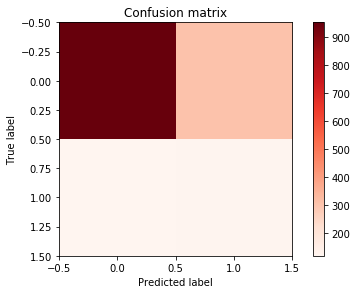

In [133]:
##Train_score defined under Classification Errors Testing tab under Model 1: KNN

train_score(RF,X_train,Y_train,X_test,Y_test)

In [134]:
y_pred = RF.predict(X_test)

In [135]:
metrics.precision_score(Y_test, y_pred, average='weighted')

0.7906181729693132

In [136]:
metrics.recall_score(Y_test, y_pred, average='weighted')

0.7164674634794157

In [137]:
confusion_matrix(Y_test, y_pred)

array([[953, 307],
       [120, 126]])

In [21]:
X_test

,pitcher.pitch_zone,hitter.last_name_Bader,hitter.last_name_Carpenter,hitter.last_name_DeJong,hitter.last_name_Fowler,hitter.last_name_García,hitter.last_name_Gyorko,hitter.last_name_Martinez,hitter.last_name_Martínez,hitter.last_name_Mikolas,...,hitter.last_name_Wacha,hitter.last_name_Weaver,hitter.last_name_Wong,pitcher.pitch_type_CH,pitcher.pitch_type_CT,pitcher.pitch_type_CU,pitcher.pitch_type_FA,pitcher.pitch_type_SI,pitcher.pitch_type_SL,pitcher.pitch_type_SP
3153,11.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2984,11.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2599,11.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3977,12.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2327,11.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4396,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3507,11.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
286,7.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
971,12.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2905,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
RF.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.82027638, 0.17972362],
       [1.        , 0.        ],
       ...,
       [0.25568182, 0.74431818],
       [0.9       , 0.1       ],
       [0.24431231, 0.75568769]])

## Log Regression

#### Seeing how it will do training on the whole set

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
LRall = LogisticRegression(class_weight = {0:1,1:5})
LRall.fit(X,y)
LRall.score(X, y)

quick_test_afew_times(LRall, X, y)


0.7002688172043011


In [182]:
y_predLRall = LRall.predict(X)
metrics.confusion_matrix(y, y_predLRall)

array([[2898, 1301],
       [ 303,  515]])

#### Seeing how it will do T-T-S

In [183]:
LR = LogisticRegression(class_weight = {0:1,1:5})
LR.fit(X_train,Y_train)
LR.score(X_test, Y_test)

quick_test_afew_times(LR, X_train, Y_train)

0.6759628154050465


In [184]:
y_predLR = LR.predict(X_test)

In [186]:
metrics.confusion_matrix(Y_test, y_predLR)

array([[865, 395],
       [ 93, 153]])

In [228]:
metrics.precision_score(Y_test, y_predLR, average='weighted')

0.8010392788749304

In [188]:
metrics.recall_score(Y_test, y_predLR, average='weighted')

0.6759628154050464

#### Predict Proba Exploration

** Practicing Predic_proba for the purposes of the flask app.** 

In [215]:
score = LR.predict_proba(X_test)

In [216]:
score

array([[0.68174696, 0.31825304],
       [0.65038304, 0.34961696],
       [0.60811309, 0.39188691],
       ...,
       [0.14598361, 0.85401639],
       [0.31630842, 0.68369158],
       [0.49108751, 0.50891249]])

In [224]:
results = {"score": score[0,0]}

In [226]:
#### If the proba that it will be a hit is over 50% it will predict hit. 
results

{'score': 0.681746958655565}

In [221]:
LR.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

#### Format for Flask App exploration

In [295]:
trying = [{"pitcher.pitch_zone":10.0,"hitter.last_name_Bader":1,"hitter.last_name_Carpenter":0,"hitter.last_name_DeJong":0,"hitter.last_name_Fowler":0,"hitter.last_name_Garc\\u00eda":0,"hitter.last_name_Gyorko":0,"hitter.last_name_Martinez":0,"hitter.last_name_Mikolas":0,"hitter.last_name_Molina":0,"hitter.last_name_Munoz":0,"hitter.last_name_Ozuna":0,"hitter.last_name_Pe\\u00f1a":0,"hitter.last_name_Pham":0,"hitter.last_name_Wacha":0,"hitter.last_name_Weaver":0,"hitter.last_name_Wong":0,"pitcher.pitch_type_CH":1,"pitcher.pitch_type_CT":0,"pitcher.pitch_type_CU":0,"pitcher.pitch_type_FA":0,"pitcher.pitch_type_SI":0,"pitcher.pitch_type_SL":0,"pitcher.pitch_type_SP":0}]

In [396]:
data= {"example": [14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]}

trying2 = np.matrix(data["example"])

In [397]:
trying2

matrix([[14.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [398]:
LR.predict_proba(trying2)

array([[0.80821791, 0.19178209]])

In [290]:
p = X_test.to_json(orient = 'records')

## Catboost

#### New X and Y that aren't dummified

In [9]:
ycat = carddata_input['hit_type'] 
Xcat = carddata_input.drop('hit_type',1)

In [12]:
ycat2 = ycat.map(mapper)


#### New T-T-S

In [13]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xcat, ycat2, test_size=0.3, random_state=42, stratify = ycat2)

In [14]:
X_trainc['hitter.last_name'].value_counts()

Carpenter    410
Fowler       404
DeJong       401
Martinez     379
Ozuna        350
Pham         323
Molina       313
Wong         264
Bader        187
Gyorko       130
García       112
Wacha         47
Munoz         47
Mikolas       38
Peña          34
Weaver        33
Name: hitter.last_name, dtype: int64

In [16]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

categorical_features_indices = np.where(X_trainc.dtypes != np.float)[0]
train_pool = Pool(X_trainc, y_trainc, cat_features=categorical_features_indices)

Catset=CatBoostClassifier(loss_function = 'Logloss', class_weights = [1,4])
Cat = Catset.fit(X_trainc, y_trainc, cat_features=categorical_features_indices);

0:	learn: 0.6874251	total: 63.4ms	remaining: 1m 3s
1:	learn: 0.6818066	total: 71.4ms	remaining: 35.6s
2:	learn: 0.6767851	total: 77.5ms	remaining: 25.8s
3:	learn: 0.6720858	total: 84ms	remaining: 20.9s
4:	learn: 0.6681357	total: 94.6ms	remaining: 18.8s
5:	learn: 0.6636402	total: 104ms	remaining: 17.2s
6:	learn: 0.6595415	total: 110ms	remaining: 15.6s
7:	learn: 0.6555470	total: 118ms	remaining: 14.7s
8:	learn: 0.6520056	total: 125ms	remaining: 13.8s
9:	learn: 0.6486640	total: 137ms	remaining: 13.5s
10:	learn: 0.6456150	total: 144ms	remaining: 12.9s
11:	learn: 0.6425800	total: 150ms	remaining: 12.3s
12:	learn: 0.6399404	total: 156ms	remaining: 11.8s
13:	learn: 0.6373824	total: 162ms	remaining: 11.4s
14:	learn: 0.6353018	total: 168ms	remaining: 11.1s
15:	learn: 0.6331011	total: 175ms	remaining: 10.7s
16:	learn: 0.6310420	total: 181ms	remaining: 10.5s
17:	learn: 0.6295663	total: 187ms	remaining: 10.2s
18:	learn: 0.6277338	total: 193ms	remaining: 9.97s
19:	learn: 0.6258674	total: 201ms	rema

180:	learn: 0.5792406	total: 1.52s	remaining: 6.9s
181:	learn: 0.5792184	total: 1.53s	remaining: 6.9s
182:	learn: 0.5792169	total: 1.54s	remaining: 6.89s
183:	learn: 0.5792128	total: 1.55s	remaining: 6.87s
184:	learn: 0.5792127	total: 1.55s	remaining: 6.85s
185:	learn: 0.5792127	total: 1.56s	remaining: 6.84s
186:	learn: 0.5792126	total: 1.57s	remaining: 6.82s
187:	learn: 0.5792058	total: 1.57s	remaining: 6.8s
188:	learn: 0.5792056	total: 1.58s	remaining: 6.78s
189:	learn: 0.5791744	total: 1.59s	remaining: 6.76s
190:	learn: 0.5789049	total: 1.59s	remaining: 6.76s
191:	learn: 0.5787775	total: 1.6s	remaining: 6.74s
192:	learn: 0.5787773	total: 1.61s	remaining: 6.73s
193:	learn: 0.5787765	total: 1.61s	remaining: 6.71s
194:	learn: 0.5787747	total: 1.62s	remaining: 6.69s
195:	learn: 0.5787218	total: 1.63s	remaining: 6.68s
196:	learn: 0.5787194	total: 1.64s	remaining: 6.66s
197:	learn: 0.5787149	total: 1.64s	remaining: 6.65s
198:	learn: 0.5787083	total: 1.65s	remaining: 6.63s
199:	learn: 0.57

357:	learn: 0.5698375	total: 3.2s	remaining: 5.74s
358:	learn: 0.5698351	total: 3.22s	remaining: 5.74s
359:	learn: 0.5698329	total: 3.22s	remaining: 5.73s
360:	learn: 0.5694097	total: 3.23s	remaining: 5.72s
361:	learn: 0.5694075	total: 3.24s	remaining: 5.71s
362:	learn: 0.5691185	total: 3.25s	remaining: 5.7s
363:	learn: 0.5687570	total: 3.26s	remaining: 5.69s
364:	learn: 0.5687509	total: 3.26s	remaining: 5.68s
365:	learn: 0.5686649	total: 3.27s	remaining: 5.66s
366:	learn: 0.5686591	total: 3.27s	remaining: 5.65s
367:	learn: 0.5686572	total: 3.28s	remaining: 5.64s
368:	learn: 0.5686518	total: 3.29s	remaining: 5.62s
369:	learn: 0.5686515	total: 3.29s	remaining: 5.61s
370:	learn: 0.5686491	total: 3.3s	remaining: 5.6s
371:	learn: 0.5686440	total: 3.31s	remaining: 5.59s
372:	learn: 0.5686421	total: 3.32s	remaining: 5.58s
373:	learn: 0.5686377	total: 3.33s	remaining: 5.57s
374:	learn: 0.5683056	total: 3.33s	remaining: 5.56s
375:	learn: 0.5678912	total: 3.35s	remaining: 5.55s
376:	learn: 0.56

533:	learn: 0.5382565	total: 4.65s	remaining: 4.06s
534:	learn: 0.5381412	total: 4.67s	remaining: 4.05s
535:	learn: 0.5380052	total: 4.67s	remaining: 4.04s
536:	learn: 0.5378858	total: 4.68s	remaining: 4.04s
537:	learn: 0.5378469	total: 4.69s	remaining: 4.03s
538:	learn: 0.5378416	total: 4.7s	remaining: 4.02s
539:	learn: 0.5378269	total: 4.71s	remaining: 4.01s
540:	learn: 0.5378217	total: 4.71s	remaining: 4s
541:	learn: 0.5376525	total: 4.72s	remaining: 3.99s
542:	learn: 0.5374785	total: 4.73s	remaining: 3.98s
543:	learn: 0.5372780	total: 4.74s	remaining: 3.97s
544:	learn: 0.5370390	total: 4.75s	remaining: 3.96s
545:	learn: 0.5369441	total: 4.75s	remaining: 3.95s
546:	learn: 0.5368730	total: 4.76s	remaining: 3.94s
547:	learn: 0.5367942	total: 4.77s	remaining: 3.94s
548:	learn: 0.5367518	total: 4.78s	remaining: 3.92s
549:	learn: 0.5365693	total: 4.79s	remaining: 3.92s
550:	learn: 0.5364862	total: 4.79s	remaining: 3.91s
551:	learn: 0.5364508	total: 4.8s	remaining: 3.9s
552:	learn: 0.5364

708:	learn: 0.5169046	total: 6.11s	remaining: 2.51s
709:	learn: 0.5167358	total: 6.12s	remaining: 2.5s
710:	learn: 0.5167331	total: 6.13s	remaining: 2.49s
711:	learn: 0.5165328	total: 6.14s	remaining: 2.48s
712:	learn: 0.5163807	total: 6.14s	remaining: 2.47s
713:	learn: 0.5161849	total: 6.15s	remaining: 2.46s
714:	learn: 0.5160859	total: 6.16s	remaining: 2.46s
715:	learn: 0.5159540	total: 6.17s	remaining: 2.45s
716:	learn: 0.5159495	total: 6.17s	remaining: 2.44s
717:	learn: 0.5158219	total: 6.18s	remaining: 2.43s
718:	learn: 0.5158155	total: 6.19s	remaining: 2.42s
719:	learn: 0.5156817	total: 6.2s	remaining: 2.41s
720:	learn: 0.5156775	total: 6.21s	remaining: 2.4s
721:	learn: 0.5152950	total: 6.22s	remaining: 2.39s
722:	learn: 0.5148257	total: 6.22s	remaining: 2.38s
723:	learn: 0.5148008	total: 6.23s	remaining: 2.38s
724:	learn: 0.5147968	total: 6.24s	remaining: 2.37s
725:	learn: 0.5147345	total: 6.25s	remaining: 2.36s
726:	learn: 0.5147306	total: 6.26s	remaining: 2.35s
727:	learn: 0.5

881:	learn: 0.4959931	total: 7.58s	remaining: 1.01s
882:	learn: 0.4956892	total: 7.59s	remaining: 1.01s
883:	learn: 0.4955731	total: 7.6s	remaining: 998ms
884:	learn: 0.4954879	total: 7.61s	remaining: 989ms
885:	learn: 0.4954173	total: 7.62s	remaining: 980ms
886:	learn: 0.4951739	total: 7.63s	remaining: 972ms
887:	learn: 0.4950965	total: 7.64s	remaining: 963ms
888:	learn: 0.4950560	total: 7.64s	remaining: 955ms
889:	learn: 0.4950315	total: 7.65s	remaining: 946ms
890:	learn: 0.4949687	total: 7.66s	remaining: 937ms
891:	learn: 0.4949310	total: 7.67s	remaining: 929ms
892:	learn: 0.4948463	total: 7.68s	remaining: 920ms
893:	learn: 0.4948079	total: 7.68s	remaining: 911ms
894:	learn: 0.4946193	total: 7.69s	remaining: 903ms
895:	learn: 0.4944704	total: 7.7s	remaining: 894ms
896:	learn: 0.4944250	total: 7.71s	remaining: 885ms
897:	learn: 0.4943410	total: 7.72s	remaining: 877ms
898:	learn: 0.4943289	total: 7.72s	remaining: 868ms
899:	learn: 0.4941562	total: 7.73s	remaining: 859ms
900:	learn: 0.

In [17]:
y_predcat = Cat.predict(X_testc)

In [23]:
metrics.accuracy_score(y_testc, y_predcat)

0.6908602150537635

In [18]:
metrics.confusion_matrix(y_testc, y_predcat )

array([[872, 374],
       [ 86, 156]])

In [19]:
metrics.precision_score(y_testc, y_predcat, pos_label=0)

0.9102296450939458

In [20]:
metrics.recall_score(y_testc, y_predcat, pos_label=0)

0.6998394863563403

#### Trial for Flask App

In [444]:
data2= {"example": ['Wong','CU',11.0]}

trying3 = np.matrix(data2["example"])

trying4 = (data2["example"])
trying4

['Wong', 'CU', 11.0]

In [428]:
#pool = Pool(data2)

In [452]:
Cat.predict([['Bader','CU',1]])

array([0.])

In [453]:
Cat.predict_proba([['Bader','CU',1]])

array([[0.99899447, 0.00100553]])

#### Feature Importance

In [22]:
feature_importances = Cat.get_feature_importance(train_pool)
feature_names = X_trainc.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

pitcher.pitch_zone: 44.58454783356755
hitter.last_name: 32.85102269601051
pitcher.pitch_type: 22.564429470421942


## Model 2: KNN

#### T-T-S

In [ ]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))


##Could you print the list of predictions? 

In [ ]:
y_predknn = knn.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_predknn)

#### CV

In [ ]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn_best = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(knn_best, X, y, cv=5, scoring='accuracy')
print(scores)
#10 different numbers. One for each test set. Accuracy for each test set. 
#Makes sense. Instead of just one test, you get 10! 

In [ ]:
print(scores.mean())

# Predicting Multi Class Outcome

#### Splitting into X&y

In [39]:
## Combining all types of contact
mapper2 = {'0': 0, 'FB': 1 , 'LD': 2, 'PU':3, 'GB': 4}

In [40]:
y2 = carddata_dum['hit_type'] 
X2 = carddata_dum.drop('hit_type',1)

In [41]:
y2 = y2.map(mapper2)

#### Train - Test - Split

In [42]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.3, stratify = y2)

## KNN

In [ ]:
#### TRY CHANGING THE WEIGHTS?
#### Drop the left or right hand! You don't need it. 

In [ ]:
# Train on training set, and Test on testing set
knnm = KNeighborsClassifier(n_neighbors=2)
knnm.fit(X_train2, Y_train2)
y_pred2 = knnm.predict(X_test2)
print(metrics.accuracy_score(Y_test2, y_pred2))


##Could you print the list of predictions? 

In [ ]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

#Testing how predictive the models are. 
# Using logistic regression! (See it run them below).

def train_score(classifier,X_train, Y_train, X_test, Y_test):
    clf = classifier.fit(X_train, Y_train)
    # accuracy for test & train:
    train_acc=clf.score(X_train, Y_train)
    test_acc=clf.score(X_test,Y_test)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = Y_test
    y_pred = clf.predict(X_test)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    #In this instance, 1 stands for people who died. 
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [ ]:
##Train_score defined under Classification Errors Testing tab under Model 1: KNN

train_score(knnm,X_train2,Y_train2,X_test2,Y_test2)

In [ ]:
y_predknnm = knnm.predict(X_test2)

metrics.precision_score(Y_test2, y_predknnm, average='weighted')

In [ ]:
##### Macro versus micro. Sklearn.metrics. 

## Logistic Regression

In [ ]:
## 1 vs. rest or multiclass <-- or soft max. 

In [43]:
LRm = LogisticRegression(class_weight = {0:1,1:5})
LRm.fit(X_train2,Y_train2)
LRm.score(X_test2, Y_test2)

quick_test_afew_times(LRm, X_train2, Y_train2)

0.6965471447543161


In [44]:
y_predLRm = LRm.predict(X_test2)

In [45]:
confusion_matrix(Y_test2, y_predLRm)

array([[852, 408,   0,   0,   0],
       [ 15,  46,   0,   0,   0],
       [ 19,  39,   0,   0,   0],
       [  2,  14,   0,   0,   0],
       [ 51,  60,   0,   0,   0]])

In [48]:
X_test2

,pitcher.pitch_zone,hitter.last_name_Bader,hitter.last_name_Carpenter,hitter.last_name_DeJong,hitter.last_name_Fowler,hitter.last_name_García,hitter.last_name_Gyorko,hitter.last_name_Martinez,hitter.last_name_Martínez,hitter.last_name_Mikolas,...,hitter.last_name_Wacha,hitter.last_name_Weaver,hitter.last_name_Wong,pitcher.pitch_type_CH,pitcher.pitch_type_CT,pitcher.pitch_type_CU,pitcher.pitch_type_FA,pitcher.pitch_type_SI,pitcher.pitch_type_SL,pitcher.pitch_type_SP
197,6.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
432,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2079,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
430,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4503,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2689,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1618,13.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3709,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4667,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1041,12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
for i in y_predLRm:
    print(i)

1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
1
0
0
1
1
0
1
0
0
1
0
0
1
0
1
0
1
0
1
1
1
0
0
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
1
0
0
0
1
1
1
1
0
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
0
1
1
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
1
1
1
1
1
0
0
0
1
0
1
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
1
1
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0


In [46]:
LRm.predict_proba(X_test2)

array([[0.4179607 , 0.5820393 ],
       [0.24391909, 0.75608091],
       [0.70339639, 0.29660361],
       ...,
       [0.17795287, 0.82204713],
       [0.21594602, 0.78405398],
       [0.76924179, 0.23075821]])

## Random Forest

In [ ]:
def quick_test(model, X, y):
    model.fit(X_train2, Y_train2)
    return model.score(X_test2, Y_test2)
    

def quick_test_afew_times(model, X, y, n=10):
    print( np.mean([quick_test(model, X, y) for j in range(n)]))

In [ ]:
RF = RandomForestClassifier(class_weight = {0:1,1:5})
RF.fit(X_train2,Y_train2)
RF.score(X_test2, Y_test2)

quick_test_afew_times(RF, X_train2, Y_train2)

In [152]:
from sklearn import metrics 

### Trying out confusion matrix prediction.

y2_pred = RF.predict(X_test2)

metrics.confusion_matrix(Y_test2, y2_pred)

array([[935, 325,   0,   0,   0],
       [ 15,  46,   0,   0,   0],
       [ 17,  41,   0,   0,   0],
       [  6,  10,   0,   0,   0],
       [ 41,  70,   0,   0,   0]])

In [ ]:
### Trying out precision score. 

metrics.precision_score(Y_test2, y2_pred, average='weighted')

In [ ]:
metrics.f1_score(Y_test2, y2_pred, average = 'weighted')

In [ ]:
metrics.recall_score(Y_test2, y2_pred, average = 'weighted')

# Prepping For Flask App

In [518]:
carddataApp = pd.read_csv('AllSeason.csv').drop('Unnamed: 0',1)

In [519]:
carddata_inputApp = carddataApp.filter(items = [
       'hitter.last_name', 
 #   'pitcher.hitter_hand',
#'pitcher.pitcher_hand',
       #'pitcher.last_name', 
       'pitcher.pitch_type',
    #'pitcher.pitch_speed',
       'pitcher.pitch_zone',  
    'hit_type'])

In [520]:
carddata_inputApp = carddata_inputApp[carddata_inputApp['hitter.last_name'] != 'Martínez']

In [521]:
#carddata_inputApp.to_csv('pitchpredictApp')

In [522]:
#pitches = pd.read_csv("pitchpredictApp").drop('Unnamed: 0',1)

In [523]:
ycat = carddata_inputApp['hit_type'] 
Xcat = carddata_inputApp.drop('hit_type',1)

In [524]:
ycat2 = ycat.map(mapper)

In [525]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

categorical_features_indices = np.where(Xcat.dtypes != np.float)[0]

CatsetApp =CatBoostClassifier(loss_function = 'Logloss', class_weights = [1,4])
CatApp = Catset.fit(Xcat, ycat2, cat_features=categorical_features_indices);

0:	learn: 0.6875821	total: 32ms	remaining: 32s
1:	learn: 0.6823933	total: 64.1ms	remaining: 32s
2:	learn: 0.6773427	total: 108ms	remaining: 36s
3:	learn: 0.6727993	total: 130ms	remaining: 32.4s
4:	learn: 0.6685298	total: 152ms	remaining: 30.2s
5:	learn: 0.6653387	total: 173ms	remaining: 28.6s
6:	learn: 0.6614744	total: 194ms	remaining: 27.5s
7:	learn: 0.6577079	total: 219ms	remaining: 27.1s
8:	learn: 0.6543127	total: 245ms	remaining: 26.9s
9:	learn: 0.6511879	total: 271ms	remaining: 26.9s
10:	learn: 0.6480754	total: 295ms	remaining: 26.5s
11:	learn: 0.6450638	total: 320ms	remaining: 26.3s
12:	learn: 0.6424722	total: 342ms	remaining: 26s
13:	learn: 0.6400265	total: 368ms	remaining: 25.9s
14:	learn: 0.6377496	total: 387ms	remaining: 25.4s
15:	learn: 0.6355288	total: 411ms	remaining: 25.3s
16:	learn: 0.6334381	total: 435ms	remaining: 25.2s
17:	learn: 0.6319417	total: 462ms	remaining: 25.2s
18:	learn: 0.6299939	total: 487ms	remaining: 25.2s
19:	learn: 0.6286387	total: 508ms	remaining: 24.9

162:	learn: 0.5898190	total: 4.01s	remaining: 20.6s
163:	learn: 0.5898190	total: 4.03s	remaining: 20.6s
164:	learn: 0.5898190	total: 4.05s	remaining: 20.5s
165:	learn: 0.5898190	total: 4.07s	remaining: 20.5s
166:	learn: 0.5898190	total: 4.09s	remaining: 20.4s
167:	learn: 0.5898190	total: 4.11s	remaining: 20.4s
168:	learn: 0.5898189	total: 4.13s	remaining: 20.3s
169:	learn: 0.5898189	total: 4.15s	remaining: 20.3s
170:	learn: 0.5898189	total: 4.17s	remaining: 20.2s
171:	learn: 0.5897949	total: 4.19s	remaining: 20.2s
172:	learn: 0.5894870	total: 4.22s	remaining: 20.2s
173:	learn: 0.5894870	total: 4.24s	remaining: 20.1s
174:	learn: 0.5894870	total: 4.26s	remaining: 20.1s
175:	learn: 0.5894870	total: 4.28s	remaining: 20s
176:	learn: 0.5894870	total: 4.3s	remaining: 20s
177:	learn: 0.5894870	total: 4.32s	remaining: 19.9s
178:	learn: 0.5891704	total: 4.34s	remaining: 19.9s
179:	learn: 0.5891686	total: 4.36s	remaining: 19.9s
180:	learn: 0.5891686	total: 4.38s	remaining: 19.8s
181:	learn: 0.588

323:	learn: 0.5828676	total: 7.58s	remaining: 15.8s
324:	learn: 0.5828381	total: 7.6s	remaining: 15.8s
325:	learn: 0.5828376	total: 7.62s	remaining: 15.8s
326:	learn: 0.5828376	total: 7.64s	remaining: 15.7s
327:	learn: 0.5825832	total: 7.66s	remaining: 15.7s
328:	learn: 0.5825831	total: 7.68s	remaining: 15.7s
329:	learn: 0.5825823	total: 7.71s	remaining: 15.6s
330:	learn: 0.5824843	total: 7.73s	remaining: 15.6s
331:	learn: 0.5824843	total: 7.75s	remaining: 15.6s
332:	learn: 0.5822184	total: 7.77s	remaining: 15.6s
333:	learn: 0.5822184	total: 7.8s	remaining: 15.6s
334:	learn: 0.5818995	total: 7.83s	remaining: 15.5s
335:	learn: 0.5818989	total: 7.84s	remaining: 15.5s
336:	learn: 0.5818979	total: 7.86s	remaining: 15.5s
337:	learn: 0.5818969	total: 7.88s	remaining: 15.4s
338:	learn: 0.5818969	total: 7.9s	remaining: 15.4s
339:	learn: 0.5818969	total: 7.92s	remaining: 15.4s
340:	learn: 0.5816776	total: 7.95s	remaining: 15.4s
341:	learn: 0.5816505	total: 7.97s	remaining: 15.3s
342:	learn: 0.5

493:	learn: 0.5723621	total: 11.5s	remaining: 11.7s
494:	learn: 0.5723620	total: 11.5s	remaining: 11.7s
495:	learn: 0.5723072	total: 11.5s	remaining: 11.7s
496:	learn: 0.5723072	total: 11.5s	remaining: 11.7s
497:	learn: 0.5722746	total: 11.5s	remaining: 11.6s
498:	learn: 0.5722173	total: 11.5s	remaining: 11.6s
499:	learn: 0.5722164	total: 11.6s	remaining: 11.6s
500:	learn: 0.5722119	total: 11.6s	remaining: 11.5s
501:	learn: 0.5721953	total: 11.6s	remaining: 11.5s
502:	learn: 0.5721953	total: 11.6s	remaining: 11.5s
503:	learn: 0.5721361	total: 11.6s	remaining: 11.4s
504:	learn: 0.5721361	total: 11.6s	remaining: 11.4s
505:	learn: 0.5720902	total: 11.7s	remaining: 11.4s
506:	learn: 0.5720767	total: 11.7s	remaining: 11.4s
507:	learn: 0.5720649	total: 11.7s	remaining: 11.3s
508:	learn: 0.5716807	total: 11.7s	remaining: 11.3s
509:	learn: 0.5715861	total: 11.7s	remaining: 11.3s
510:	learn: 0.5715650	total: 11.7s	remaining: 11.2s
511:	learn: 0.5715321	total: 11.8s	remaining: 11.2s
512:	learn: 

652:	learn: 0.5645118	total: 14.1s	remaining: 7.48s
653:	learn: 0.5645045	total: 14.1s	remaining: 7.46s
654:	learn: 0.5643331	total: 14.1s	remaining: 7.43s
655:	learn: 0.5642782	total: 14.1s	remaining: 7.41s
656:	learn: 0.5642187	total: 14.2s	remaining: 7.39s
657:	learn: 0.5642178	total: 14.2s	remaining: 7.36s
658:	learn: 0.5642093	total: 14.2s	remaining: 7.34s
659:	learn: 0.5640235	total: 14.2s	remaining: 7.31s
660:	learn: 0.5639078	total: 14.2s	remaining: 7.29s
661:	learn: 0.5638649	total: 14.2s	remaining: 7.26s
662:	learn: 0.5638493	total: 14.2s	remaining: 7.24s
663:	learn: 0.5638395	total: 14.3s	remaining: 7.21s
664:	learn: 0.5638157	total: 14.3s	remaining: 7.19s
665:	learn: 0.5638104	total: 14.3s	remaining: 7.17s
666:	learn: 0.5638103	total: 14.3s	remaining: 7.14s
667:	learn: 0.5638096	total: 14.3s	remaining: 7.12s
668:	learn: 0.5638068	total: 14.3s	remaining: 7.1s
669:	learn: 0.5637976	total: 14.4s	remaining: 7.07s
670:	learn: 0.5636875	total: 14.4s	remaining: 7.04s
671:	learn: 0

815:	learn: 0.5574161	total: 17.2s	remaining: 3.87s
816:	learn: 0.5574028	total: 17.2s	remaining: 3.85s
817:	learn: 0.5574027	total: 17.2s	remaining: 3.82s
818:	learn: 0.5573729	total: 17.2s	remaining: 3.8s
819:	learn: 0.5573728	total: 17.2s	remaining: 3.78s
820:	learn: 0.5573171	total: 17.2s	remaining: 3.76s
821:	learn: 0.5571729	total: 17.2s	remaining: 3.73s
822:	learn: 0.5571422	total: 17.3s	remaining: 3.71s
823:	learn: 0.5571043	total: 17.3s	remaining: 3.69s
824:	learn: 0.5571042	total: 17.3s	remaining: 3.67s
825:	learn: 0.5571041	total: 17.3s	remaining: 3.65s
826:	learn: 0.5570970	total: 17.3s	remaining: 3.62s
827:	learn: 0.5570855	total: 17.3s	remaining: 3.6s
828:	learn: 0.5570679	total: 17.4s	remaining: 3.58s
829:	learn: 0.5570602	total: 17.4s	remaining: 3.56s
830:	learn: 0.5569529	total: 17.4s	remaining: 3.54s
831:	learn: 0.5569529	total: 17.4s	remaining: 3.52s
832:	learn: 0.5568456	total: 17.4s	remaining: 3.49s
833:	learn: 0.5567033	total: 17.4s	remaining: 3.47s
834:	learn: 0.

980:	learn: 0.5464263	total: 19.7s	remaining: 382ms
981:	learn: 0.5463855	total: 19.7s	remaining: 362ms
982:	learn: 0.5463643	total: 19.7s	remaining: 342ms
983:	learn: 0.5463560	total: 19.8s	remaining: 321ms
984:	learn: 0.5463317	total: 19.8s	remaining: 301ms
985:	learn: 0.5463160	total: 19.8s	remaining: 281ms
986:	learn: 0.5463151	total: 19.8s	remaining: 261ms
987:	learn: 0.5463151	total: 19.8s	remaining: 241ms
988:	learn: 0.5462830	total: 19.8s	remaining: 221ms
989:	learn: 0.5461172	total: 19.8s	remaining: 200ms
990:	learn: 0.5459802	total: 19.9s	remaining: 180ms
991:	learn: 0.5459761	total: 19.9s	remaining: 160ms
992:	learn: 0.5458402	total: 19.9s	remaining: 140ms
993:	learn: 0.5457697	total: 19.9s	remaining: 120ms
994:	learn: 0.5455838	total: 19.9s	remaining: 100ms
995:	learn: 0.5455833	total: 19.9s	remaining: 80.1ms
996:	learn: 0.5451366	total: 19.9s	remaining: 60ms
997:	learn: 0.5449280	total: 20s	remaining: 40ms
998:	learn: 0.5445853	total: 20s	remaining: 20ms
999:	learn: 0.5443

In [526]:
import pickle
# save the model to disk
filename = 'Baseball_pickle2.sav'
pickle.dump(CatApp, open(filename, 'wb'))

In [538]:
# practicing loading the model from disk
PREDICT = pickle.load(open(filename, 'rb'))
x =[["Martinez", "CU", 1]]
result = PREDICT.predict_proba(x)
print(result)

[[0.67854607 0.32145393]]


In [528]:
## ALTERNATE WAY
with open("Baseball_pickle2.sav", 'rb') as picklefile:
    PREDICTOR = pickle.load(picklefile)

In [529]:
PREDICTOR.predict_proba([['Wong','CU',10.0]])

array([[0.95003802, 0.04996198]])

In [539]:
## Double checking it's the same...
CatApp.predict_proba([["Weaver", "CU", 1]])

array([[0.54299277, 0.45700723]])